https://basedosdados.org/dataset/fc7e9d13-714d-42c1-8986-bd2a3108e208?table=31415e13-ba3d-4fe0-ba27-0242ee076f7f

https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/consumo-de-energia-eletrica

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


Plot das ações da EGIE

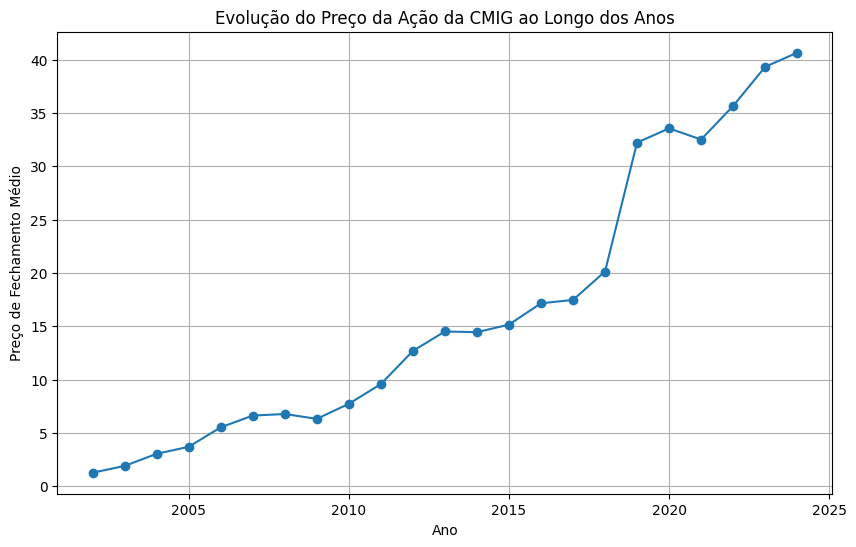

In [12]:
df = pd.read_csv('../data/dados_unificados_filtrado.csv', sep=',')

# formato datetime
df['data'] = pd.to_datetime(df['data'])

# Filtro de empresa
empresa_desejada = 'EGIE'
df_filtrado = df[df['empresa'] == empresa_desejada]

# Agrupar por ano e calcular o preço de fechamento médio
df_ano = df_filtrado.groupby(df_filtrado['data'].dt.year)['vl_fechamento'].mean().reset_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_ano['data'], df_ano['vl_fechamento'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento Médio')
plt.title('Evolução do Preço da Ação da CMIG ao Longo dos Anos')
plt.grid(True)
plt.show()

Plot do consumo anual de energia no Brasil

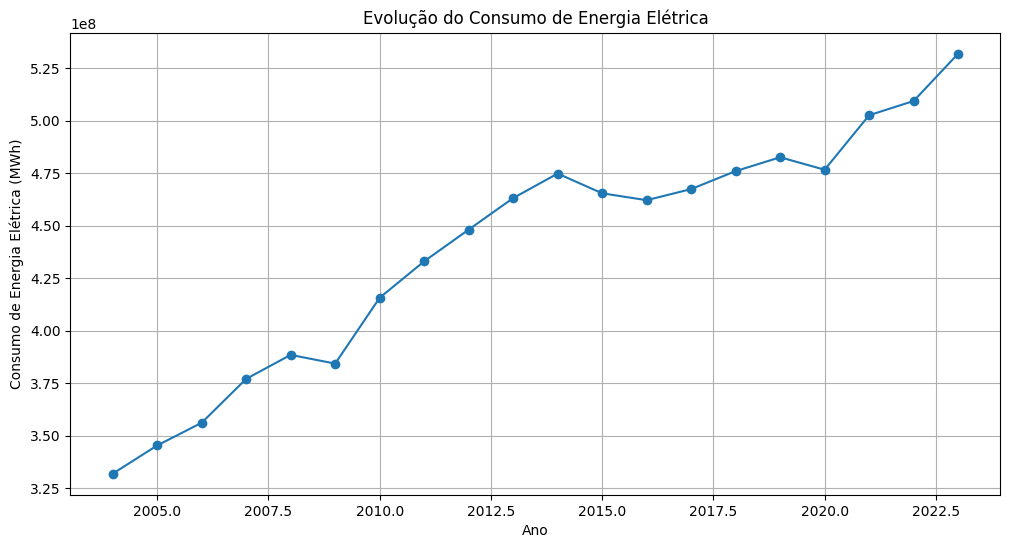

In [5]:
data = {'Ano': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
        'Consumo (MWh)': [331865174, 345336260, 356129316, 377030014, 388472399, 384306380, 415667758, 433015634, 448126391, 463138258, 474827814, 465429675, 462137717, 467434030, 475986560, 482586067, 476654642, 502601588, 509388629, 531900346]}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.plot(df['Ano'], df['Consumo (MWh)'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia Elétrica (MWh)')
plt.title('Evolução do Consumo de Energia Elétrica')
plt.grid(True)
plt.show()

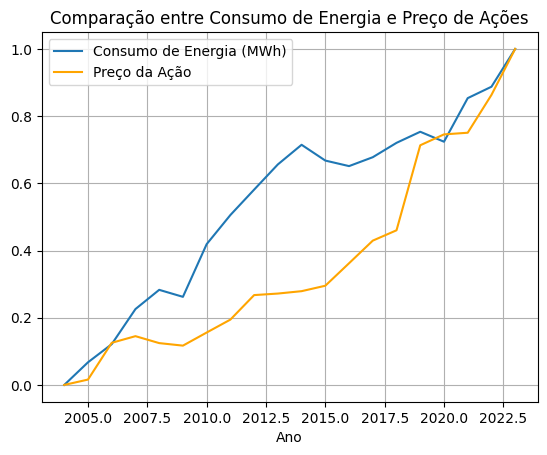

In [43]:

data = {'Ano': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
        'Consumo (MWh)': [331865174, 345336260, 356129316, 377030014, 388472399, 384306380, 415667758, 433015634, 448126391, 463138258, 474827814, 465429675, 462137717, 467434030, 475986560, 482586067, 476654642, 502601588, 509388629, 531900346]}
df_consumo = pd.DataFrame(data)

df_acoes = pd.read_csv('dados_unificados_filtrado.csv')

# Converter a coluna 'data' para o formato datetime
df_acoes['data'] = pd.to_datetime(df_acoes['data'])

# Agrupar os dados de ações por ano e calcular a média do preço de fechamento
df_acoes_anual = df_acoes.groupby(df_acoes['data'].dt.year)['vl_fechamento'].mean().reset_index()

df_combinado = pd.merge(df_consumo, df_acoes_anual, left_on='Ano', right_on='data', how='inner')

# Normalizando os dados
scaler = MinMaxScaler()
df_combinado[['Consumo (MWh)', 'vl_fechamento']] = scaler.fit_transform(df_combinado[['Consumo (MWh)', 'vl_fechamento']])

plt.plot(df_combinado['Ano'], df_combinado['Consumo (MWh)'], label='Consumo de Energia (MWh)')
plt.plot(df_combinado['Ano'], df_combinado['vl_fechamento'], label='Preço da Ação', color='orange')
plt.xlabel('Ano')
plt.title('Comparação entre Consumo de Energia e Preço de Ações')
plt.legend()
plt.grid(True)
plt.show()



Buscar dados relacionados ao energia armazenada, entender se por ter muita energia acumulada influencia diretamente o preço das ações